In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [4]:
df=pd.read_csv("train.csv", usecols=["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Embarked"])

In [5]:
df["family"]= df["SibSp"]+df["Parch"]+1

In [6]:
df=df.drop(columns=["SibSp", "Parch"])
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [7]:
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode().iloc[0], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10708\1411835033.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_10708\1411835033.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [8]:
x=df.iloc[:, 1:]
y=df.iloc[:, 0]

In [9]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [10]:
functf=["family"]
cat_cols=[ 0,1, 3]


In [11]:
x_train

,Pclass,Sex,Age,Embarked,family
331,1,male,45.500000,S,1
733,2,male,23.000000,S,1
382,3,male,32.000000,S,1
704,3,male,26.000000,S,2
813,3,female,6.000000,S,7
...,...,...,...,...,...
106,3,female,21.000000,S,1
270,1,male,29.699118,S,1
860,3,male,41.000000,S,3
435,1,female,14.000000,S,4


<Axes: >

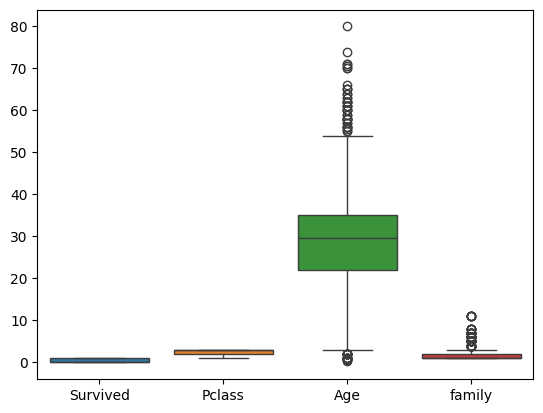

In [12]:
sns.boxplot(df)

In [13]:
outlier=["Age", "family"]
upper_bond= df[outlier].quantile(0.97)
lower_bond= df[outlier].quantile(0.03)

df[outlier]= np.where(df[outlier]>=upper_bond, upper_bond,  np.where(df[outlier]<=lower_bond, lower_bond, df[outlier]))

# outliers does not do much impact on classification algorithms

<Axes: >

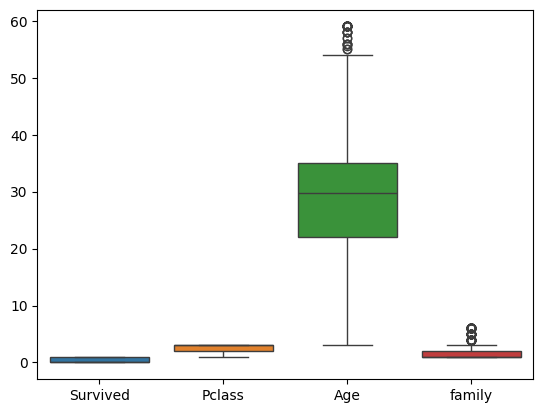

In [14]:
sns.boxplot(df)

In [15]:
processor=ColumnTransformer([("ohe", OneHotEncoder(handle_unknown="ignore", drop="first"), cat_cols)], remainder="passthrough")

In [16]:
pipe= Pipeline([("processor", processor),
                ("classifier", DecisionTreeClassifier())])

In [17]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('processor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [0, 1, 3])])),
                ('classifier', DecisionTreeClassifier())])

In [18]:
y_pred=pipe.predict(x_test)
np.mean(cross_val_score(pipe, x_train,y_train, scoring="accuracy", cv= 5)), accuracy_score(y_test,y_pred)

(np.float64(0.7794740470796808), 0.7988826815642458)

In [19]:
pipe2=Pipeline([("processor", processor),
               ("clf", RandomForestClassifier(n_estimators=80, random_state=42))])

In [20]:
pipe2.fit(x_train,y_train)


Pipeline(steps=[('processor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [0, 1, 3])])),
                ('clf',
                 RandomForestClassifier(n_estimators=80, random_state=42))])

In [21]:
y_pred2=pipe2.predict(x_test)
np.mean(cross_val_score(pipe2, x_train, y_train, scoring= "accuracy", cv=5)),accuracy_score(y_test,y_pred)

(np.float64(0.7949374569092879), 0.7988826815642458)

In [22]:
new_data=pd.DataFrame([[1,'male', 52, 'C', 5]], columns=x_train.columns)
processor.transform(new_data)

array([[ 0.,  0.,  1.,  0.,  0., 52.,  5.]])

In [23]:
pipe.predict(new_data)

array([1])